# Liset ripples example usage

## Create a liset_tk instance
Liset_tk object has all the functionalities for loading, visualizing and doing predictions on the data. <br><br>
#### <span style="color:#24938b;">***Class***</span> `liset_tk()`
- **Inputs**
    - *data_path:* should be the path to the folder where the **.dat** file and **info.mat** live in. Optionally it can have a .csv file with the ground truth events of the desired signals. 
    - *shank:* The shank of electrodes chosen to get from the recording. _(Only one shank at a time)_
    - *downsample:* Downsamples the data from its original FS to **1250Hz**
    - *numSamples (Optional):* If reading a dataset too big, it can be only loaded X number of samples with this parameter.

In [12]:
# Import the class from the liset_tk.py file
import sys
from liset_tk import liset_tk

# Define the path to your data
path = r'C:\__NeuroSpark_Liset_Dataset__\neurospark_mat\CNN TRAINING SESSIONS\Amigo2_1_hippo_2019-07-11_11-57-07_1150um' # Modify this to your data path folder
liset = liset_tk(data_path=path, shank=3, downsample=4000, verbose=True, start=1000000, numSamples=200000)

Downsampling data from 30000 Hz to 4000 Hz... Done!
Normalizing data... Done!
Shape of loaded data after downsampling and z-score:  (26667, 8)


## Data visualization
### Overview data features

In [3]:
# Explore the loaded data.

print(f'Original Sampling Frequency: {liset.original_fs} Hz')
print(f'Current Sampling Frequency: {liset.fs} Hz')
print(f'Shape of the loaded data: {liset.data.shape}')
print(f'Duration of the loaded data: {liset.duration} seconds')
print('\n')
if liset.has_ripples:
    print(f'Number of loaded GT ripples: {len(liset.ripples_GT)}')
    print(f'Overview of the ripples:\n\n{liset.ripples_GT[0:5]}\n...')

Original Sampling Frequency: 30000 Hz
Current Sampling Frequency: 4000 Hz
Shape of the loaded data: (26667, 8)
Duration of the loaded data: 6.66675 seconds


Number of loaded GT ripples: 5
Overview of the ripples:

[[ 6667  6832]
 [ 7131  7327]
 [ 5400  5565]
 [ 4758  5062]
 [14450 14632]]
...


## Visualize the data

#### <span style="color:#24938b;">***function***</span> `liset.plot_event()`
- **Inputs**
    - *time_window*: ***tuple*** --> (start, stop)
    - *offset*: ***float***, default: ***0***
    - *extend*: ***bool***, default: ***False***
    - *delimiter*: ***bool***, default: ***False***
    - *show*: ***bool***, default: ***True***
    - *filtered*: ***iterable***, default: ***[]***
    - *title*: ***str***, default: ***''***
    - *label*: ***str***, default: ***''***
    - *show_ground_truth*: ***bool***, default: ***False***
    - *show_predictions*: ***bool***, default: ***False***

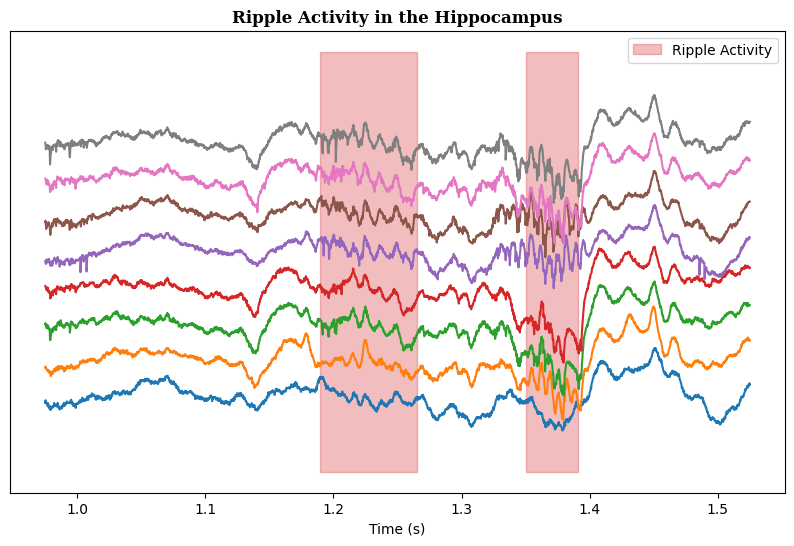

In [4]:
# Plot the loaded channels in a time window.
window = [4000, 6000]

# Play with the offset and extend parameters to zoom in and out of the data.
offset = 3
extend = 100
liset.plot_event(window, 
                 offset=offset, 
                 extend=extend, 
                 show_ground_truth=True, 
                 label='Ripple Activity',
                 title='Ripple Activity in the Hippocampus'
                    )

## Load CNN or SNN network models
(Other models to be implemented... ) <br><br>
- CNN model folder should have this structure: <br>
<img src="img/model_structure.png" alt="Model Structure" width="600"/>

- parent path of the SNN trained model should be inserted with ```sys.path.insert()``` method.

#### <span style="color:#24938b;">***function***</span> `liset.load_model()`
- **Inputs**
    - *model_path:* ***str***

Load *CNN* model

In [20]:
# Put the correct path to your tensorflow model
model_path = '../runSNN/CNN_vs_SNN/CNN/' # Change this to your path
liset.load_model(model_path)

# Overview the structure of the loaded model.
# print(liset.model.summary()) # See the layers of the model

Loading model... 
Running on:  CPU
Done!


Alternatively, load SNN model

In [24]:
sys.path.insert(0, '../trainSNN')
model_path = '../trainSNN/optimized_model/pytorchNetwork/256_128/E50_Y50/network.pt'
liset.load_model(model_path)

Loading model... 
Running on:  CPU
Done!


## Predict with the loaded model

#### <span style="color:#24938b;">***function***</span> `liset.predict()`
- **Inputs**
    - *threshold (Default=0.7):* ***float***

Use the <span style="color:#3498db;">***predict function***</span> to predict the ripple times. 
The function gets the input size of the loaded model and prepares the data to iterate all through, so the number of predictions will depend on the model input size and the lenght of the data.

**CNN**

In [21]:
# The CNN model has a threshold for deterining whether a ripple is detected or not.
liset.predict(threshold=0.3)
print(liset.prediction_times)

42/42 [==============================] - 0s 4ms/step
[[1.35    1.35975]
 [1.375   1.38475]
 [1.505   1.51475]
 [1.69    1.69975]
 [1.73    1.73975]
 [1.81    1.81975]
 [1.82    1.82975]
 [2.025   2.03975]
 [2.33    2.33975]
 [3.925   3.94475]]


**SNN**

In [25]:
liset.predict()
print(liset.prediction_times)

[[1.3265  1.381  ]
 [1.663   1.7225 ]
 [1.768   1.82775]
 [3.598   3.657  ]]


## Plot the predictions on the data

#### <span style="color:#24938b;">***use***</span> `liset.plot_event()` 
Use the functon ```plot_event```
<br><br>

Overview the accuracy of the model compared to the ground truth events.

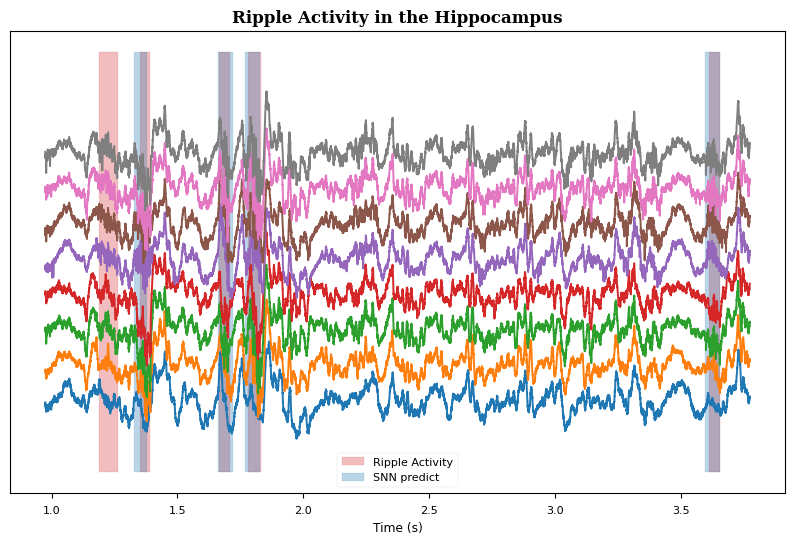

In [30]:
liset.plot_event(
    event=[4000, 15000], 
    offset=offset, 
    extend=extend, 
    show_ground_truth=True, 
    show_predictions=True,
    label='Ripple Activity',
    title='Ripple Activity in the Hippocampus'
)

## Check the performance of the model

#### <span style="color:#24938b;">***function***</span> `liset.evaluate()`
- **Inputs**
    - *preds*: ***iterable***, *default*: ***```None```***
    - *chart*: ***bool*** (whether to show or not the plot) <br>
    - *model_type*: ***str***, *default*: ***''***

Provide the Precision, Recall and F1 Score. If no preds are provided, it will use the obtained from liset.predict().

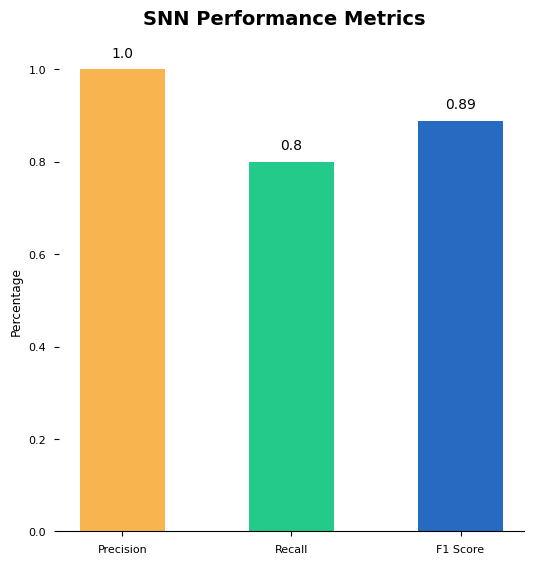

In [27]:
liset.evaluate(chart=True)